In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

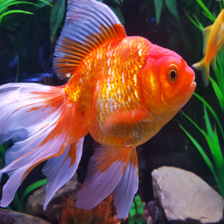

In [ ]:
# importing modules
import urllib.request
  
urllib.request.urlretrieve(
  'https://cf.ltkcdn.net/small-pets/images/orig/278587-1600x1066-goldfish-swimming-in-fish-tank.jpg',
   "./drive/MyDrive/files/gold_fish.jpg")         # google drive must be mounted on colab
  
gold_fish = Image.open("./drive/MyDrive/files/gold_fish.jpg").resize(IMAGE_SHAPE)
gold_fish


In [ ]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...]

array([[[[0.21568627, 0.69019608, 0.23137255],
         [0.22352941, 0.71764706, 0.22352941],
         [0.22745098, 0.73333333, 0.22745098],
         ...,
         [0.16470588, 0.25490196, 0.2       ],
         [0.17254902, 0.34901961, 0.17647059],
         [0.18823529, 0.60784314, 0.21960784]],

        [[0.21176471, 0.70588235, 0.20784314],
         [0.21176471, 0.70980392, 0.20392157],
         [0.19215686, 0.68235294, 0.19215686],
         ...,
         [0.08235294, 0.16078431, 0.1254902 ],
         [0.12156863, 0.24313725, 0.12941176],
         [0.18039216, 0.5254902 , 0.17254902]],

        [[0.16078431, 0.65098039, 0.16078431],
         [0.12941176, 0.59215686, 0.14509804],
         [0.12156863, 0.58039216, 0.17254902],
         ...,
         [0.09411765, 0.17647059, 0.12941176],
         [0.11372549, 0.21176471, 0.1254902 ],
         [0.17647059, 0.45882353, 0.15686275]],

        ...,

        [[0.14901961, 0.09803922, 0.16470588],
         [0.16470588, 0.11764706, 0.18039216]

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
urllib.request.urlretrieve(
  'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt',
   "./drive/MyDrive/files/Imagenetlabels.txt")                       # google drive must be mounted on google colab

with open('./drive/MyDrive/files/Imagenetlabels.txt', 'r') as f:
  image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='./drive/MyDrive/files', untar=True)

In [ ]:
data_dir

'./drive/MyDrive/files/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('drive/MyDrive/files/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

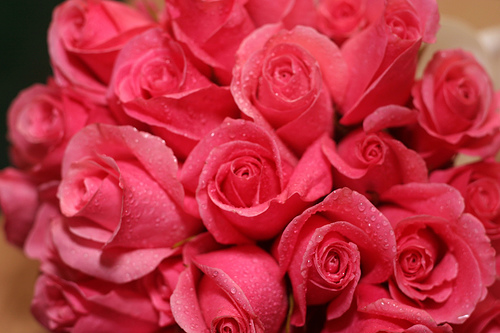

In [ ]:
Image.open(str(roses[1]))

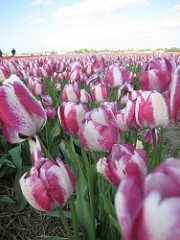

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('drive/MyDrive/files/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'drive/MyDrive/files/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(240, 178, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

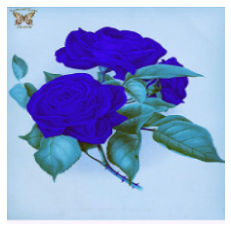

In [ ]:
plt.axis('off')
plt.imshow(X[0])

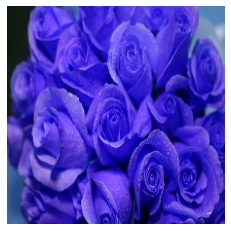

In [ ]:
plt.axis('off')
plt.imshow(X[1])

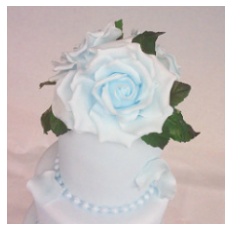

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 795])

In [ ]:
image_labels[795]

'shower curtain'

Now take pre-trained model and retrain it using flowers images

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_10 (KerasLayer)  (None, 1280)             2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 13s 85ms/step - loss: 0.8209 - acc: 0.7024
Epoch 2/5
86/86 [==============================] - 7s 84ms/step - loss: 0.4135 - acc: 0.8532
Epoch 3/5
86/86 [==============================] - 7s 84ms/step - loss: 0.3260 - acc: 0.8928
Epoch 4/5
86/86 [==============================] - 7s 84ms/step - loss: 0.2681 - acc: 0.9172
Epoch 5/5
86/86 [==============================] - 7s 83ms/step - loss: 0.2314 - acc: 0.9306


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 99ms/step - loss: 0.4017 - acc: 0.8595


[0.4017002284526825, 0.8594771027565002]

In [ ]:
model.predict(X_test_scaled)

array([[-1.6639451 , -1.3265462 , -6.654308  , -4.0637417 , -4.5443306 ],
       [ 5.2987323 , -7.909645  , -4.579337  , -5.794877  , -1.0624655 ],
       [-4.6938224 , -3.6962016 , -0.65370786, -3.5371044 , -4.090378  ],
       ...,
       [-4.427414  , -2.3534136 , -1.3317691 ,  5.2245636 , -6.8699455 ],
       [ 2.5072083 , -0.78399515, -7.802416  , -6.8103833 , -1.1208712 ],
       [-4.3968143 , -2.7079604 , -6.198674  ,  3.1008558 , -5.5658474 ]],
      dtype=float32)

In [ ]:
predictions = model.predict(X_test_scaled)
score = tf.nn.softmax(predictions[7])


In [ ]:
y_test[7]